In [1]:
%matplotlib inline

In [32]:
import numpy as np
import numpy.ma as ma
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from colorspacious import cspace_convert

In [3]:
mpl.rcParams["figure.dpi"] = 144
plt.style.use('dark_background')

In [71]:
def add_alpha(im):
    im = np.asanyarray(im)
    if im.shape[-1]!=3:
        raise ValueError("Input image appears to have %d color channels, "
                         "should have exactly 3" % im.shape[-1])
    new_shape = im.shape[:-1]+(4,)
    new_im = ma.zeros(new_shape, dtype=im.dtype)
    new_im[...,:3] = im
    new_im[...,3] = 1
    new_im[ma.any(ma.getmaskarray(im),axis=-1),3] = 0
    return new_im
def mask_image(im):
    c = ~np.all(np.isfinite(im),axis=-1)
    c |= np.any(im<0, axis=-1)
    mim = ma.array(im)
    mim[c,:] = ma.masked
    return mim

In [85]:
lab = np.zeros((1025,1024,3), dtype=float)
lab[:,:,0] = 50.
lab[:,:,1] = np.linspace(-60,115,lab.shape[0])[:,None]
lab[:,:,2] = np.linspace(-150,70,lab.shape[1])[None,:]


0.9857479601370217
2.5530705822762733e-06
0.5798551829268292


Text(0, 0.5, 'b*')

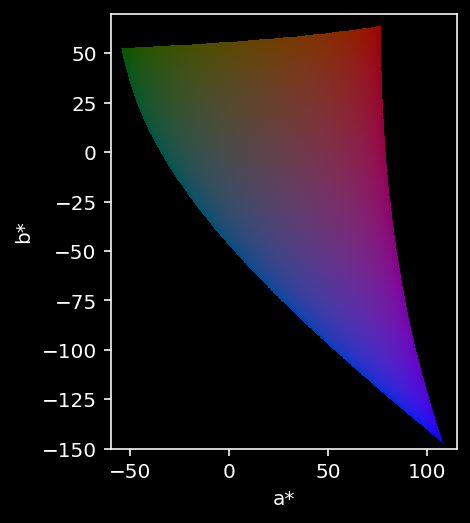

In [86]:
xyz1 = cspace_convert(lab,"CIELab","XYZ1")
xyz1 /= np.amax(cspace_convert(xyz1,"XYZ1","sRGB1-linear"))
srgb = cspace_convert(xyz1,"XYZ1","sRGB1")
srgb = mask_image(srgb)

print(ma.amax(srgb))
print(ma.amin(srgb))
print(np.sum(srgb.mask)/np.prod(srgb.shape))

fig = plt.figure()
ax = plt.subplot(111)
ax.imshow(add_alpha(srgb).transpose((1,0,2)), 
          extent=(lab[0,0,1],lab[-1,-1,1],
                  lab[0,0,2],lab[-1,-1,2]),
          origin="lower")
ax.set_aspect("equal")
ax.set_xlabel("a*")
ax.set_ylabel("b*")



In [77]:
jch = np.zeros((1026,1027,3), dtype=float)
jch[:,:,0] = 21.11
ch_x = np.linspace(-100,100,jch.shape[0])[:,None]
ch_y = np.linspace(-100,100,jch.shape[1])[None,:]
jch[:,:,1] = np.hypot(ch_x,ch_y)
jch[:,:,2] = np.rad2deg(np.arctan2(ch_y,ch_x)) % 360

19.6 0.9420864487696164 -0.008364942711331981 0.1971439742925419
20.0 0.9558334924250335 0.0061217421837453 0.20135104612119936
19.8309691353658 0.9520911999347385 0.0021988438591950435 0.1995564210754084
19.75594574182102 0.9487945168304311 -0.0012697354251270728 0.1987478433181298
19.75594574182102
0.9487945168304311
5.466812244891983e-08
0.8012521566818702


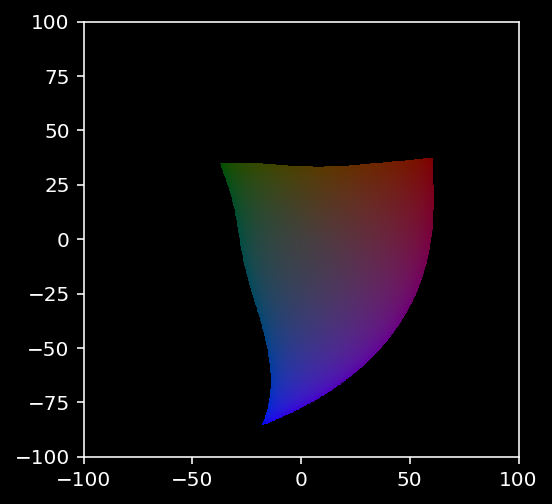

In [78]:
def cvt(j):
    jch_adj = jch.copy()
    jch_adj[:,:,0] = j
    return mask_image(cspace_convert(jch_adj,"JCh","sRGB1"))
def m(j):
    i = cvt(j)
    r = np.log(ma.amax(i)/0.95)
    print(j,ma.amax(i),r,i.count()/np.prod(i.shape))
    return r
best_j = scipy.optimize.brentq(m,19.6,20,xtol=0.1)
srgb = cvt(best_j)

print(best_j)
print(ma.amax(srgb))
print(ma.amin(srgb))
print(np.sum(srgb.mask)/np.prod(srgb.shape))

fig = plt.figure()
ax = plt.subplot(111)
ax.imshow(add_alpha(srgb).transpose((1,0,2)), 
          extent=(ch_x[0,0],ch_x[-1,-1],
                  ch_y[0,0],ch_y[-1,-1]),
          origin="lower")
ax.set_aspect("equal")
#ax.set_xlabel("a*")
#ax.set_ylabel("b*")
